# Prediction on FIFA Soccer World Cup using Decision Tree and Random Forest classifiers

#### Task 1: Setting the stage

#### Task 2: Training, validating and estimating the performance of a Decion Tree Classifier as an example of a prediction model

#### Task 3: Training, validating and estimating the performance of a Random Forest Classifier as an alternative example of a prediction model

#### Task 4: Extracting the most important features for both prediction models

#### Task 5: Getting Insight into influence of the values for the most important features and for both prediction models

## Task 1: Setting the stage

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#libraries for decission tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#libraries for random forest classifier
from sklearn.ensemble import RandomForestClassifier

import eli5
from eli5.sklearn import PermutationImportance

from matplotlib import pyplot as plt
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv')
print('Data shape:', data.shape)
data.head().transpose()

Data shape: (128, 27)


,0,1,2,3,4
Date,14-06-2018,14-06-2018,15-06-2018,15-06-2018,15-06-2018
Team,Russia,Saudi Arabia,Egypt,Uruguay,Morocco
Opponent,Saudi Arabia,Russia,Uruguay,Egypt,Iran
Goal Scored,5,0,0,1,0
Ball Possession %,40,60,43,57,64
Attempts,13,6,8,14,13
On-Target,7,0,3,4,3
Off-Target,3,3,3,6,6
Blocked,3,3,2,4,4
Corners,6,2,0,5,5


In [3]:
y = (data['Man of the Match']=='Yes')
features_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[features_names]
X.head().transpose()

,0,1,2,3,4
Goal Scored,5,0,0,1,0
Ball Possession %,40,60,43,57,64
Attempts,13,6,8,14,13
On-Target,7,0,3,4,3
Off-Target,3,3,3,6,6
Blocked,3,3,2,4,4
Corners,6,2,0,5,5
Offsides,3,1,1,1,0
Free Kicks,11,25,7,13,14
Saves,0,2,3,3,2


## Task 2: Making Predictions with a Decision Tree Classifier

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (96, 18)
X_test shape: (32, 18)
y_train shape: (96,)
y_test shape: (32,)


In [5]:
DecisionTree_model = DecisionTreeClassifier(random_state= 0, max_depth= 5, min_samples_split= 5).fit(X_train, y_train)

In [6]:
y_pred = DecisionTree_model.predict(X_test)

In [7]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 9  7]
 [ 6 10]]


0.59375

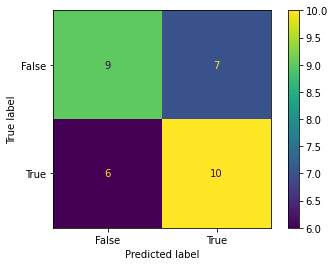

In [8]:
# plot_confusion_matrix(DecisionTree_model, X_test, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DecisionTree_model.classes_)
disp.plot()
plt.show()

## Task 3: Making Predictions with a Random Forest Classifier

In [9]:
RandomForest_model = RandomForestClassifier(n_estimators= 100, random_state= 0).fit(X_train, y_train)

In [10]:
y_pred = RandomForest_model.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  6]
 [ 4 12]]


0.6875

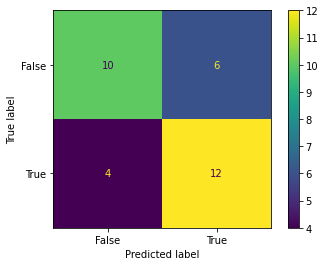

In [12]:
# plot_confusion_matrix(RandomForest_model, X_test, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RandomForest_model.classes_)
disp.plot()
plt.show()

## Task 4: Extracting the most important features for both prediction models

In [13]:
from eli5.sklearn import PermutationImportance

In [14]:
perm = PermutationImportance(RandomForest_model, random_state=1).fit(X_test, y_test)

In [15]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


In [16]:
perm = PermutationImportance(DecisionTree_model, random_state=1).fit(X_test, y_test)

In [17]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


## Task 5: Getting Insight into influence of the values for the most important features and for both prediction models

In [ ]:
feature_to_plot= 'Distance Covered (Kms)'

In [ ]:
pdp_dist= pdp.pdp_isolate(model= DecisionTree_model, dataset= X_test, model_features= features_names, 
                          feature= feature_to_plot)

In [ ]:
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [ ]:
pdp_dist= pdp.pdp_isolate(model= RandomForest_model, dataset= X_test, model_features= features_names, 
                          feature= feature_to_plot)

In [ ]:
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [18]:
from sklearn.inspection import PartialDependenceDisplay

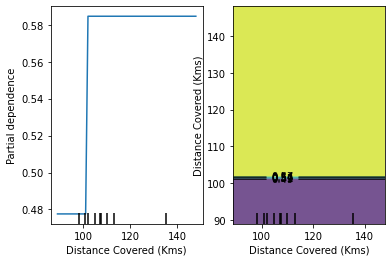

In [19]:
PartialDependenceDisplay.from_estimator(DecisionTree_model, X_test, [12, (12, 12)])
plt.show()

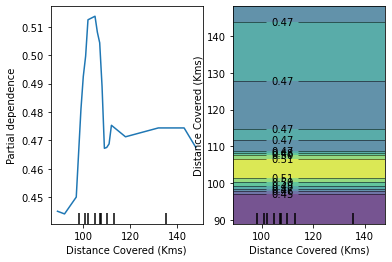

In [20]:
PartialDependenceDisplay.from_estimator(RandomForest_model, X_test, [12, (12, 12)])
plt.show()